In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.constants as sci
plt.rcParams["font.family"] = "Arial"
DPI = 300
Z = 22
TEMP = 310
import matplotlib as mpl
from matplotlib import cm
mpl.rcParams['axes.linewidth'] = 1.4
from scipy.interpolate import Rbf

In [2]:
def read_file(fname):
    f = open(fname, "r")
    fl = f.readlines()
    f.close()
    data = []
    for line in fl:
        if "#" not in line and "@" not in line:
            data.append(line.split())
    data = np.array(data, dtype = 'float')
    data = np.nan_to_num(data)
    return data

def ma(data, n):
    cumsum, moving_aves = [0], []
    for i, x in enumerate(data, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=n:
            moving_ave = (cumsum[i] - cumsum[i-n])/n
            moving_aves.append(moving_ave)
    return moving_aves

In [3]:
np_labels = ["N0", "N8", "N16", "N24", "N32", "N40", "N48"]
q_vals = [0, 8, 16, 24, 32, 40, 48]
ion_labels = ["I0", "I10", "I20", "I50", "I90", "I150"]
ion_vals = [0, 33, 66, 170, 300, 500]
c_np = cm.Blues(np.linspace(0, 1, len(np_labels)))
c_ion = cm.YlOrRd(np.linspace(0, 1, len(ion_labels)))
n_np = len(np_labels)
n_ion = len(ion_labels)

# T2

In [4]:
deg_pols = 21
Xini = 2.88

In [5]:
def clean_pmf(pmf, new_space):
    pmf[:,1] = pmf[:,1] - np.mean(pmf[-10:,1])
    #pol_av = np.poly1d(np.polyfit(pmf[:,0], pmf[:,1], deg_pols))
    #pol_std = np.poly1d(np.polyfit(pmf[:,0], pmf[:,2], deg_pols))
    #new_pmf = np.zeros((len(new_space),3))
    #new_pmf[:,0] = new_space
    #new_pmf[:,1] = pol_av(new_space)
    #new_pmf[:,2] = pol_std(new_space)
    #return new_pmf
    return pmf

In [34]:
X = np.linspace(Xini, 6, 300)
PMFT2s = []
for np_lab in np_labels:
    pmf_ion = []
    for ion_lab in ion_labels:
        pmf = read_file("T2/PMF_L_ann/T2-{}-{}_L_PMF_std.xvg".format(np_lab, ion_lab))
        pmf = clean_pmf(pmf, X)
        pmf_ion.append(pmf)
    PMFT2s.append(pmf_ion)
PMFT2s = np.array(PMFT2s)
print(np.shape(PMFT2s))

(7, 6, 200, 3)


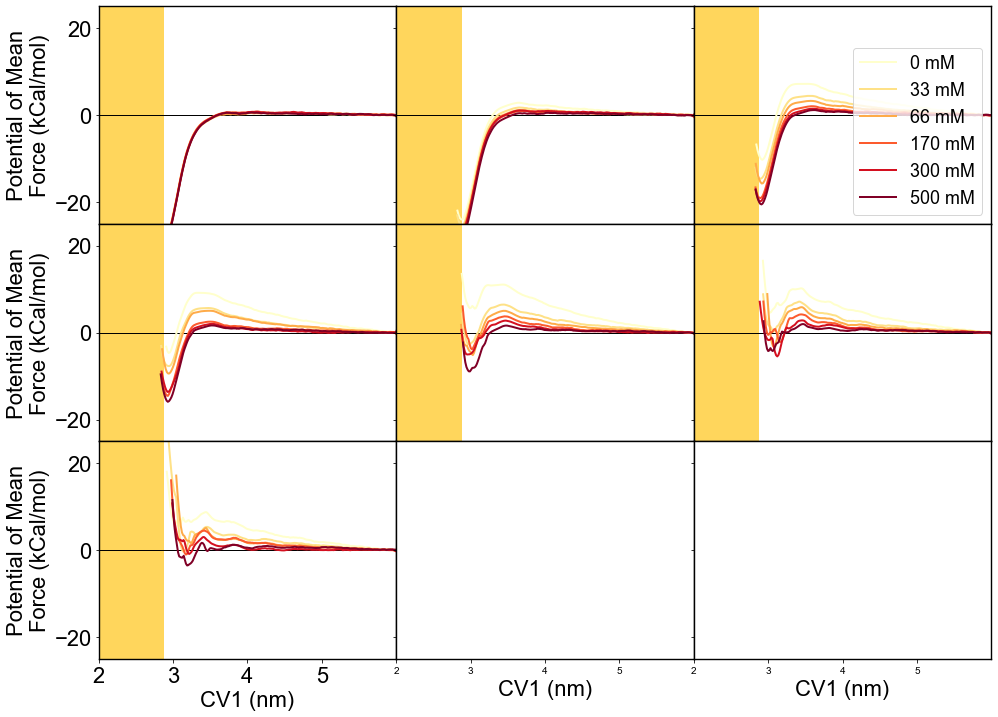

In [35]:
subplot_kw = {'xlim':(2.0,6.0), 'xticks':[2,3,4,5], 'ylim':(-25,25), 'yticks':[-20, 0, 20 ]}
gridspec_kw = {'wspace':0.0, 'hspace':0.}
fig, axs = plt.subplots(figsize = (16,12), ncols=3, nrows=3, sharex=True, sharey=True, subplot_kw=subplot_kw, gridspec_kw=gridspec_kw)
for ax in axs[:,0]:
    ax.set_ylabel("Potential of Mean\nForce (kCal/mol)", fontsize=Z)
for ax in axs[-1,:]:
    ax.set_xlabel("CV1 (nm)", fontsize=Z)
axs = axs.flatten()
for i in range(len(np_labels)):
    axs[i].tick_params(labelsize=Z)
    axs[i].axhline(y=0, c='k', lw=1.0)
    axs[i].axvspan(xmin=2,xmax=Xini, facecolor=(1,0.8,0.2), alpha=0.8)
    for j in range(len(ion_labels)):
        pmf = PMFT2s[i,j]
        axs[i].plot(pmf[:,0], pmf[:,1], c=c_ion[j], label="{} mM".format(ion_vals[j]), lw=2)
        
axs[2].legend(fontsize=Z-4, loc='lower right')
plt.show()
plt.close()

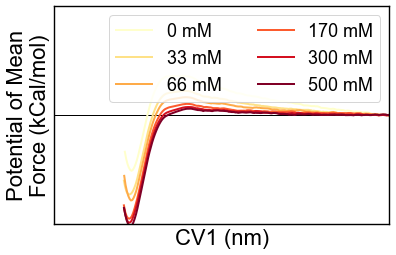

In [36]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlim((2.0, 6.0))
ax.set_xticks([])
ax.set_ylim(-20,20)
ax.set_yticks([])
ax.tick_params(labelsize=Z)
ax.axhline(y=0, c='k', lw=1.0)
ax.set_ylabel("Potential of Mean\nForce (kCal/mol)", fontsize=Z)
ax.set_xlabel("CV1 (nm)", fontsize=Z)
ax.grid()
i=2 # number of NP
for j in range(len(ion_labels)):
    pmf = PMFT2s[i,j]
    ax.plot(pmf[:,0], pmf[:,1], c=c_ion[j], label="{} mM".format(ion_vals[j]), lw=2)
a=ax.legend(fontsize=Z-4, loc='upper right', ncol=2)
plt.savefig("PMF_ex.png", format='png', dpi=DPI, bbox_extra_artists=(a,), bbox_inches='tight')
plt.show()
plt.close()

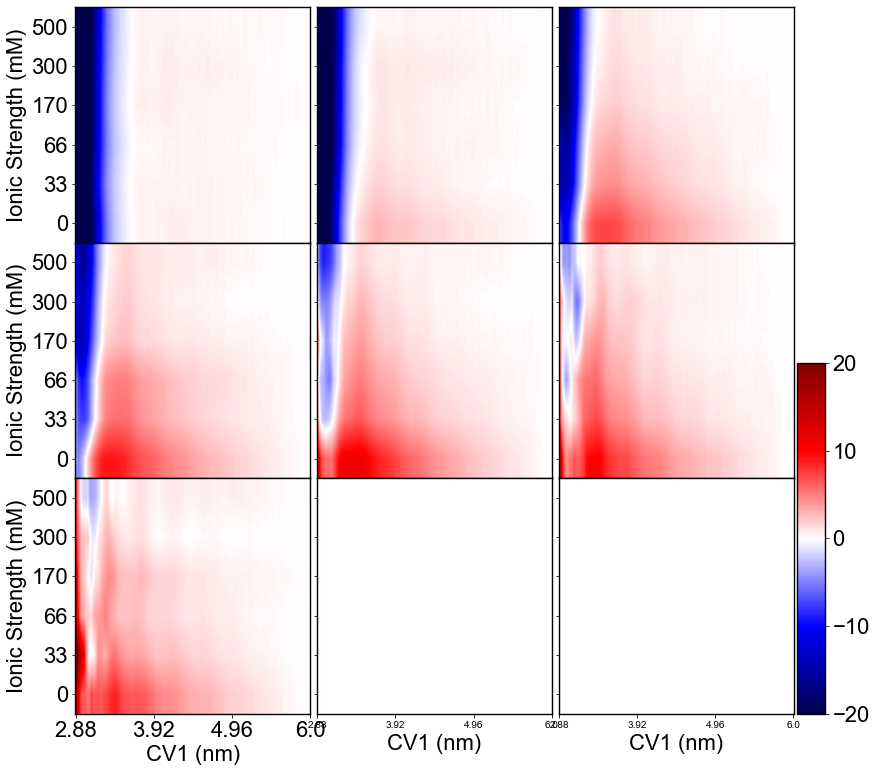

In [37]:
x_ticks = np.linspace(0,199,4)
x_ticklabels = np.linspace(Xini, 6, 4)
y_ticks = np.linspace(0,5,6)
subplot_kw = {'xlim':(-0.5,199.5), 'xticks':x_ticks, 'xticklabels':x_ticklabels, 'ylim':(-0.5,5.5), 'yticks':y_ticks, 'yticklabels':ion_vals}
gridspec_kw = {'wspace':0.0, 'hspace':0.}
fig, axs = plt.subplots(figsize = (13,13), ncols=3, nrows=3, sharex=True, sharey=True, subplot_kw=subplot_kw, gridspec_kw=gridspec_kw)
for ax in axs[:,0]:
    ax.set_ylabel("Ionic Strength (mM)", fontsize=Z)
for ax in axs[-1,:]:
    ax.set_xlabel("CV1 (nm)", fontsize=Z)
axs = axs.flatten()
for i in range(len(np_labels)):
    axs[i].tick_params(labelsize=Z)
    pmf = PMFT2s[i,:,:,1]
    cax = axs[i].imshow(pmf, vmin=-20, vmax=20, cmap='seismic', interpolation='bilinear')
    axs[i].set_aspect(1./axs[i].get_data_ratio())
axs[-1].imshow(np.zeros((200,6)), vmin=-20, vmax=20, cmap='seismic')
axs[-1].set_aspect(1./axs[i].get_data_ratio())
axs[-2].imshow(np.zeros((200,6)), vmin=-20, vmax=20, cmap='seismic')
axs[-2].set_aspect(1./axs[i].get_data_ratio())
a = plt.axes([0.9, 0.125, 0.03, 0.375])
cbar = fig.colorbar(cax, ax=a, cax=a, ticks=[-20, -10, 0, 10, 20])
cbar.ax.tick_params(labelsize=Z)
plt.show()
plt.close()

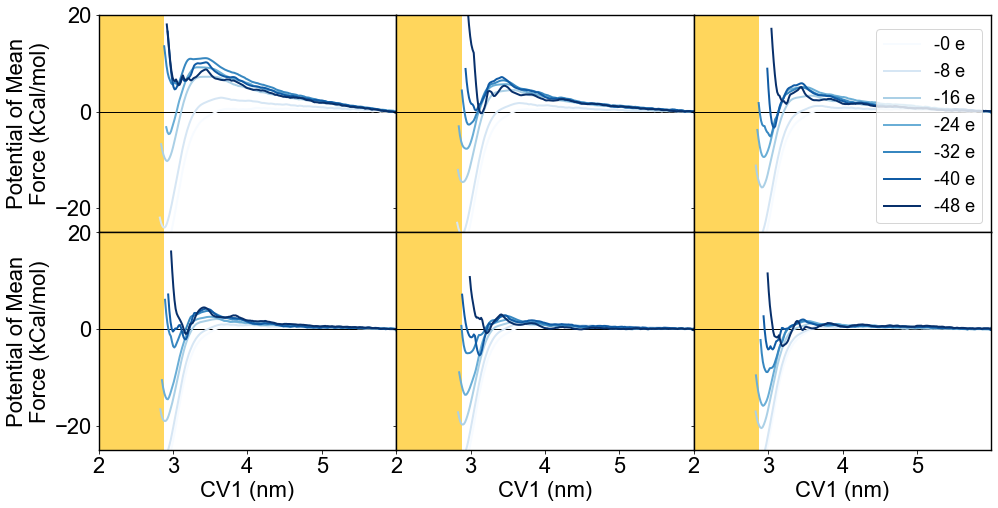

In [38]:
subplot_kw = {'xlim':(2.0,6.0), 'xticks':[2,3,4,5], 'ylim':(-25,20), 'yticks':[-20,0,20]}
gridspec_kw = {'wspace':0.0, 'hspace':0.}
fig, axs = plt.subplots(figsize = (16,8), ncols=3, nrows=2, sharex=True, sharey=True, subplot_kw=subplot_kw, gridspec_kw=gridspec_kw)
for ax in axs[:,0]:
    ax.set_ylabel("Potential of Mean\nForce (kCal/mol)", fontsize=Z)
for ax in axs[-1,:]:
    ax.set_xlabel("CV1 (nm)", fontsize=Z)
axs = axs.flatten()
for i in range(len(ion_labels)):
    axs[i].tick_params(labelsize=Z)
    axs[i].axhline(y=0, c='k', lw=1)
    axs[i].axvspan(xmin=2, xmax=Xini, facecolor=(1,0.8,0.2), alpha=0.8)    
    for j in range(len(np_labels)):
        pmf = PMFT2s[j][i]
        axs[i].plot(pmf[:,0], pmf[:,1], c=c_np[j], label="-{} e".format(q_vals[j]), lw=2)
axs[2].legend(fontsize=Z-4, loc='lower right')
plt.show()
plt.close()

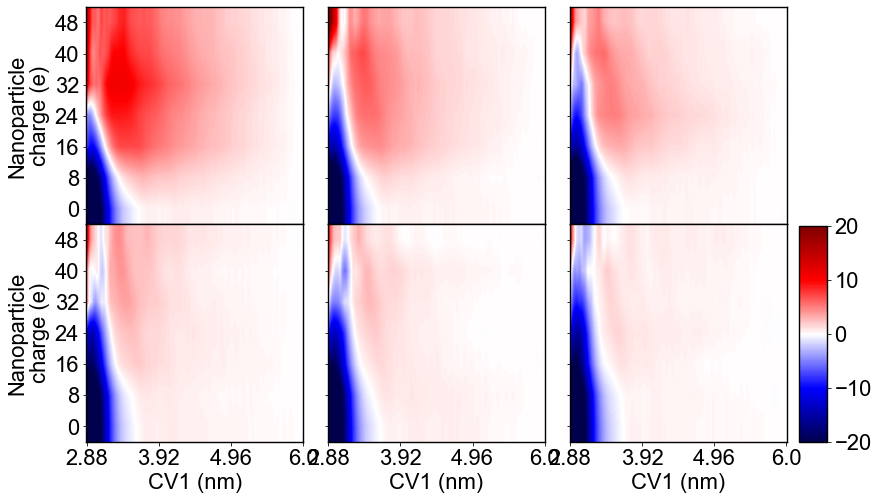

In [39]:
x_ticks = np.linspace(0,199,4)
x_ticklabels = np.linspace(Xini, 6, 4)
y_ticks = np.linspace(0,6,7)
subplot_kw = {'xlim':(-0.5,199.5), 'xticks':x_ticks, 'xticklabels':x_ticklabels, 'ylim':(-0.5,6.5), 'yticks':y_ticks, 'yticklabels':q_vals}
gridspec_kw = {'wspace':0.0, 'hspace':0.}
fig, axs = plt.subplots(figsize = (13,8), ncols=3, nrows=2, sharex=True, sharey=True, subplot_kw=subplot_kw, gridspec_kw=gridspec_kw)
for ax in axs[:,0]:
    ax.set_ylabel("Nanoparticle\ncharge (e)", fontsize=Z)
for ax in axs[-1,:]:
    ax.set_xlabel("CV1 (nm)", fontsize=Z)
axs = axs.flatten()
for i in range(len(ion_labels)):
    axs[i].tick_params(labelsize=Z)
    pmf = PMFT2s[:,i,:,1]
    cax = axs[i].imshow(pmf, vmin=-20, vmax=20, cmap='seismic', interpolation='bilinear')
    axs[i].set_aspect(1./axs[i].get_data_ratio())
a = plt.axes([0.9, 0.125, 0.03, 0.375])
cbar = fig.colorbar(cax, ax=a, cax=a, ticks=[-20, -10, 0, 10, 20])
cbar.ax.tick_params(labelsize=Z)
plt.show()

In [40]:
def dimer_frac(dg, c):
    R = sci.R/4184 #J mol-1 K-1 to kcal mol-1 K-1
    K_eq = np.exp(-dg/(R*TEMP))
    frac_p = (1+4*c*K_eq + np.sqrt(8*c*K_eq+1))/(8*K_eq)
    frac_m = (1+4*c*K_eq - np.sqrt(8*c*K_eq+1))/(8*K_eq)
    frac_p, frac_m = 2*frac_p/c, 2*frac_m/c #the 2 comes from stoichiometry, but careful. The dissociation fraction is twice the association fraction!
    return frac_m

In [41]:
def build_agg_map(conc, n_pts=500):
    xs = []
    ys = []
    fracs = []
    #agg_map = np.zeros((n_np, n_ion))
    for i in range(n_ion):
        for j in range(n_np):
            pmf = PMFT2s[j,i,:,:]        
            ndx = np.argmin(pmf[pmf[:,0]<3.3,1])
            dg_val = pmf[ndx,1]
            #agg_map[j,i] = dimer_frac(dg_val, conc)
            xs.append(j)
            ys.append(i)
            fracs.append(dimer_frac(dg_val, conc))
            
    #interpolation
    rbf = Rbf(xs, ys, fracs, epsilon=2)
    x = np.linspace(0, max(xs), n_pts)
    y = np.linspace(0, max(ys), n_pts)
    X, Y = np.meshgrid(x,y)
    Z = rbf(X, Y)
    return X, Y, Z
    #return agg_map

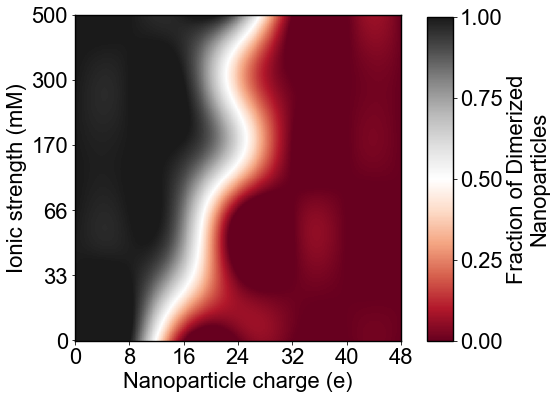

In [42]:
cmap='RdGy'
sx, sy, agg_map = build_agg_map(10**-10)
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.set_xticks(np.linspace(0,len(agg_map)-1, n_np))
ax.set_xticklabels(q_vals)
ax.set_yticks(np.linspace(0, len(agg_map)-1, n_ion))
ax.set_yticklabels(ion_vals)
ax.tick_params(labelsize=Z)
ax.set_xlabel("Nanoparticle charge (e)", fontsize=Z)
ax.set_ylabel("Ionic strength (mM)", fontsize=Z)
cax = ax.imshow(agg_map, cmap=cmap, vmin=0, vmax=1, origin='lower')

a = plt.axes([0.95, 0.125, 0.06, 0.75])
cbar = fig.colorbar(cax, ax=a, cax=a, ticks=[0, 0.25, 0.5, 0.75, 1.0])
cbar.ax.tick_params(labelsize=Z)
cbar.ax.set_ylabel("Fraction of Dimerized\nNanoparticles", fontsize=Z)
plt.savefig("PhaseDiagram_L.png", format='png', dpi=DPI, bbox_extra_artists=(a,), bbox_inches='tight')
plt.show()
plt.close()

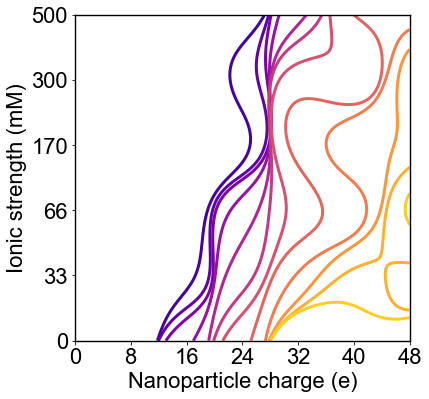

In [43]:
c_ini, c_fin = -10, 1
n_concs = c_fin-c_ini+1
concs = np.logspace(c_ini, c_fin, n_concs)
c_agg = cm.plasma(np.linspace(0.1, 0.9, n_concs))

fig = plt.figure(figsize=(6,6))
ax = plt.axes()
for conc, c in zip(concs, c_agg):
    sx, sy, agg_map = build_agg_map(conc)
    ax.contour(sx, sy, agg_map, levels=np.array([0.5]), colors=[c], linewidths=[3])
ax.set_xticks(np.linspace(0,np.max(sx), n_np))
ax.set_xticklabels(q_vals)
ax.set_yticks(np.linspace(0, np.max(sy), n_ion))
ax.set_yticklabels(ion_vals)
#ax.grid()
ax.set_xlabel("Nanoparticle charge (e)", fontsize=Z)
ax.set_ylabel("Ionic strength (mM)", fontsize=Z)
ax.tick_params(labelsize=Z)
plt.savefig("PhaseDiagram_L_contour.png", format='png', dpi=DPI, bbox_inches='tight')
plt.show()
plt.close()

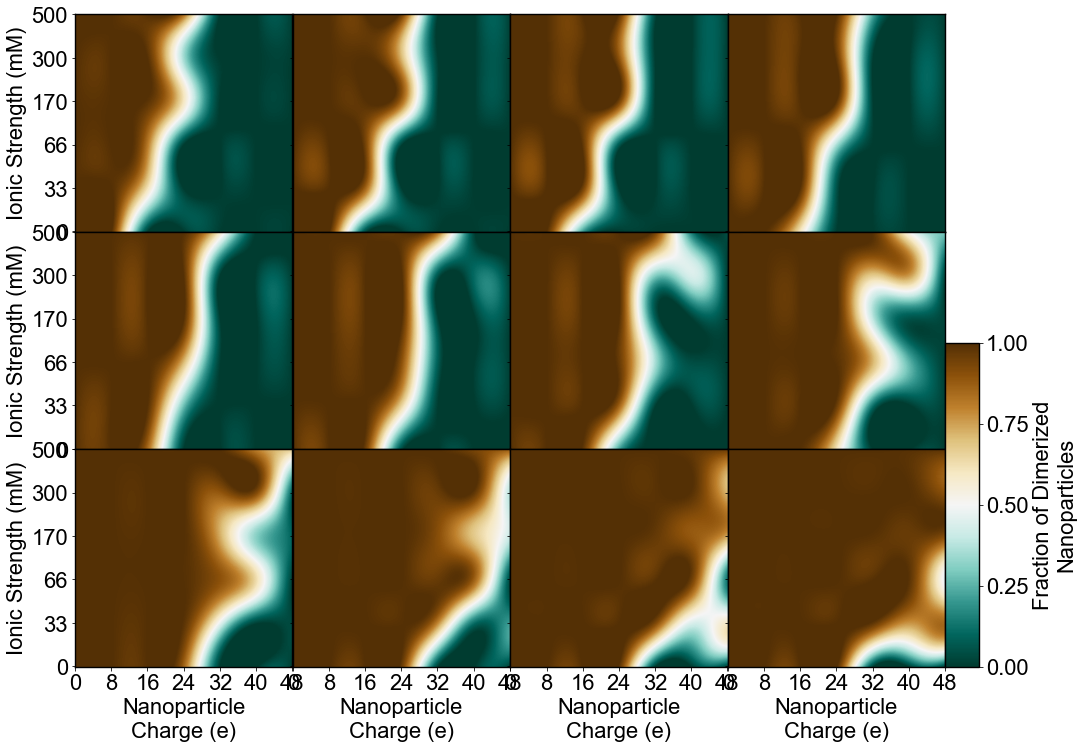

In [44]:
c_ini, c_fin = -10, 1
n_concs = c_fin-c_ini+1
n_cols = 4
n_rows = n_concs//n_cols
concs = np.logspace(c_ini, c_fin, n_concs)

n_pts = len(agg_map)
cmap='BrBG_r'
x_ticks = np.linspace(0,n_pts-1,n_np)
y_ticks = np.linspace(0,n_pts-1,n_ion)
subplot_kw = {'xlim':(-0.5,n_pts-0.5), 'xticks':x_ticks, 'xticklabels':q_vals, 'ylim':(-0.5,n_pts-0.5), 'yticks':y_ticks, 'yticklabels':ion_vals}
gridspec_kw = {'wspace':0.0, 'hspace':0.}
fig, axs = plt.subplots(figsize=(3.9*n_cols,4*n_rows), ncols=n_cols, nrows=n_rows, sharex=True, sharey=True, subplot_kw=subplot_kw, gridspec_kw=gridspec_kw)
for conc, ax in zip(concs, axs.flatten()):
    sx, sy, agg_map = build_agg_map(conc)
    ax.tick_params(labelsize=Z)
    cax = ax.imshow(agg_map, cmap=cmap, interpolation='bilinear', vmin=0, vmax=1)
for ax in axs[:,0]:
    ax.set_ylabel("Ionic Strength (mM)", fontsize=Z)
for ax in axs[-1,:]:
    ax.set_xlabel("Nanoparticle\nCharge (e)", fontsize=Z)
a = plt.axes([0.9, 0.125, 0.03, 0.375])
cbar = fig.colorbar(cax, ax=a, cax=a, ticks=[0, 0.25, 0.5, 0.75, 1.0])
cbar.ax.tick_params(labelsize=Z)
cbar.ax.set_ylabel("Fraction of Dimerized\nNanoparticles", fontsize=Z)
plt.savefig("PhaseDiagram_L.png", format='png', dpi=DPI, bbox_extra_artists=(a,), bbox_inches='tight')
plt.show()
plt.close()